In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
import os
import csv
import sys
from collections import Counter
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
csv.field_size_limit(sys.maxsize)
os.chdir('../Data/Seattle/')

In [2]:
df = pd.read_csv('individual_review_inspection_merged.csv', sep=None,engine='python')

In [5]:
# df = df_output.sample(frac=0.3)
# Create a prediction label with threshold of 40
df['label'] = np.where(df['inspection_penalty_score']>=40, 1, 0)
df2 = df[['content','label']]

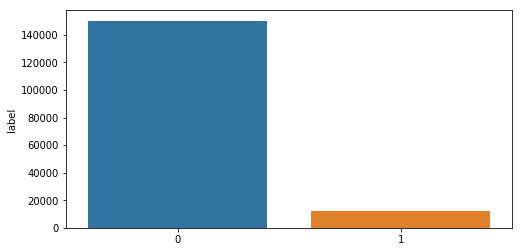

In [108]:
train, test = train_test_split(df2, test_size=0, random_state=42)
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['label'].unique(), y=train['label'].value_counts())
plt.show()

In [109]:
hy_text = [text for text in train[train['label'] == 1]['content']]
nhy_text = [text for text in train[train['label'] == 0]['content']]

In [110]:
print(len(hy_text))
print(len(nhy_text))

12012
150298


In [111]:
import spacy
nlp = spacy.load('en')
# https://www.clips.uantwerpen.be/pages/mbsp-tags
noisy_pos_tags = ['PROP','DT','IN','PUNCT','SYM','NUM','CC','CD','POS','EX']
min_token_length = 2

In [114]:
def isNoise(token):
    '''
    Check if the token is a noise or not
    '''
    is_noise = False
    if token.pos_ in noisy_pos_tags: # check for pre-defineed noisy tag
        is_noise = True
    elif token.is_stop == True: # check for stop words
        is_noise = True
    elif len(token.string) <= min_token_length:
        is_noise = True
    elif token.lemma_ == "-PRON-":
        is_noise = True
    return is_noise

def cleanup_text(reviews, logging=False):
    cleaned = []
    n = 1
    for review in reviews:
        review = nlp(review)
        if n % 100 == 0 and logging:
            print("Processed %d out of %d documents." % (n, len(reviews)))
        n += 1
        for token in review:
            tokens = [token.lemma_.lower().strip() for token in review if not isNoise(token)]
        tokens = ' '.join(tokens)
        cleaned.append(tokens)
    return pd.Series(cleaned)

In [ ]:
hy_clean = cleanup_text(hy_text,logging=True)
nhy_clean = cleanup_text(nhy_text,logging=True)

Processed 100 out of 12012 documents.
Processed 200 out of 12012 documents.
Processed 300 out of 12012 documents.
Processed 400 out of 12012 documents.
Processed 500 out of 12012 documents.
Processed 600 out of 12012 documents.
Processed 700 out of 12012 documents.
Processed 800 out of 12012 documents.
Processed 900 out of 12012 documents.
Processed 1000 out of 12012 documents.
Processed 1100 out of 12012 documents.
Processed 1200 out of 12012 documents.
Processed 1300 out of 12012 documents.
Processed 1400 out of 12012 documents.
Processed 1500 out of 12012 documents.
Processed 1600 out of 12012 documents.
Processed 1700 out of 12012 documents.
Processed 1800 out of 12012 documents.
Processed 1900 out of 12012 documents.
Processed 2000 out of 12012 documents.
Processed 2100 out of 12012 documents.
Processed 2200 out of 12012 documents.
Processed 2300 out of 12012 documents.
Processed 2400 out of 12012 documents.
Processed 2500 out of 12012 documents.
Processed 2600 out of 12012 docume

In [ ]:
hy_clean = ' '.join(hy_clean).split()
nhy_clean = ' '.join(nhy_clean).split()

In [ ]:
hy_counts = Counter(hy_clean)
nhy_counts = Counter(nhy_clean)

In [ ]:
hy_common_words = [word[0] for word in hy_counts.most_common(20)]
hy_common_counts = [word[1] for word in hy_counts.most_common(20)]

nhy_common_words = [word[0] for word in nhy_counts.most_common(20)]
nhy_common_counts = [word[1] for word in nhy_counts.most_common(20)]

In [ ]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=hy_common_words, y=hy_common_counts)
plt.title('Most Common Words used in Reviews of Hygienic Resturant')
plt.show()

In [ ]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=nhy_common_words, y=nhy_common_counts)
plt.title('Most Common Words used in Reviews of Non-Hygienic Resturant')
plt.show()

In [ ]:
def pos_words (sentence, token, ptag):
    '''
    check all tags used with a word
    '''
    # extract all review sentences that contains the term - token
    sentences = [sent for sent in sentence.sents if token in sent.string.lower()]
    pwrds = []
    for sent in sentences:
        for word in sent:
            if token in word.string:
                pwrds.extend([child.string.strip() for child in word.children
                if child.pos_ == ptag])
    return Counter(pwrds).most_common(10)

In [ ]:
# Check all adj used with the term food
pos_words(doc, 'food', 'ADJ')
